Segue anexo o notebook do jupyter para ajustar você encontrar a reta que separa os dois conjuntos e usá-la como classificador. Para isso, você tem que usar como função erro a cross-entropy e cada um dos pontos desse conjunto resultará em uma mudança dos weights e bias conforme aquela expressão que calculei com você (que depende do learning rate que é o alpha, escolha alpha = 0.01 por exemplo). Você fará isso um certo número de épocas, o que seria o número de épocas, o número de vezes que você passa o dado todo na rede neural, ou seja, depois que todos os pontos ajustarem o weight isso determina uma época. Faça um plot também da função erro em termos da época para você ver ele diminuindo (ou não). O arquivo Base_N1 é onde estão os dados. Segue anexo os plots que obtive desse trabalho que eu fiz para você ter como base, a reta preta foi a que eu obtive, comece com uma equação de reta com pesos e bias aleatórios, w1x1 + w2x2 +b =0, com w1,w2 e b aleatórios.

Para a criação deste código, foi utilizado as seguintes fontes:



Criação/revisão de gradiente estocastico:
- https://pt.d2l.ai/chapter_optimization/sgd.html
- https://scikit-learn.org/stable/modules/sgd.html

Documentação de algumas bibliotecas/funções:
- https://numpy.org/devdocs/user/index.html
- https://www.w3schools.com/python/ref_random_shuffle.asp


Para ler com mais calma:
- https://sites.icmc.usp.br/andre/research/hybrid/edna.htm
- https://www.quora.com/What-does-it-mean-that-a-neural-network-is-invariant-to-permutation-When-does-this-happen
- https://repositorio.ufu.br/bitstream/123456789/34044/4/AbordagensEvolutivasOtimiza%C3%A7%C3%A3o.pdf

## Primeiro passo:

Nesta seção foi realizado:
1. Importação de bibliotecas;
2. Leitura da base de dados;
3. Criação de bias e dos pesos;
4. Definição de hiperparâmetros
5. Criação de funções referentes à sigmoide e à cross entropy.

In [ ]:
# importando as bibliotecas necessárias
## para a criação dos gráficos:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
## para análise dos dados e afins:
import numpy as np
import pandas as pd

In [ ]:
## lendo a base de dados

data = pd.read_excel('/content/drive/MyDrive/Física - Bacharel Lic./deep learning & colisões de partículas/Base_N1_B1_2024.1.xlsx')
data.head()

,Feature1,Feature2,Label
0,0.000,5.472986,Red
1,0.005,4.326074,Red
2,0.010,5.257439,Red
3,0.015,3.321764,Red
4,0.020,5.783143,Red


In [ ]:
x = data[["Feature1","Feature2"]].values
#y = data["Label"].values.astype(float).reshape(-1,1)

#y = y.reshape(-1,1)
### definindo o viés

xb = np.c_[np.ones(x.shape[0]), x]

### definindo os pesos
np.random.seed(42)
w = np.random.rand(xb.shape[1], 1)

mapa = {"Red": 0, "Blue": 1}
y = np.array([mapa[label] for label in data["Label"]]).reshape(-1,1).astype(float)

In [ ]:
## definindo os hiperparâmetros
alpha = 0.01 ## learning rate
epocas = 100 ## numero de vezes em que o dado todo passa pela rede neural
erros = []

In [ ]:
# criando a funcao sigmoid
def sigmoid(z):
    return 1/(1 + np.exp(-z))

## criando a funcao da perda de entropia cruzada
def entropia_cruzada(y, y1):
    e = 1e-10
    y1 = np.clip(y1, e, 1-e)
    return -np.mean(y * np.log(y1) + (1-y)*np.log(1-y1))

## Segundo passo:


In [ ]:
## treinamento
print("Iniciando o treinamento...")
for epoca in range(epocas):
    # forward
    z = xb @ w
    y1 = sigmoid(z)
   ## perda
    loss = entropia_cruzada(y, y1)
    erros.append(loss)

    ## gradiente

    dw = (1 / y.shape[0]) * (xb.T @ (y1 - y))

    # atualização dos pesos
    w -= alpha * dw

print("Treinamento concluído!")
print(f"Os pesos finais são:{w}")


Iniciando o treinamento...
Treinamento concluído!
Os pesos finais são:[[ 0.29599422]
 [ 0.86936094]
 [-0.51498314]]


## Gráficos



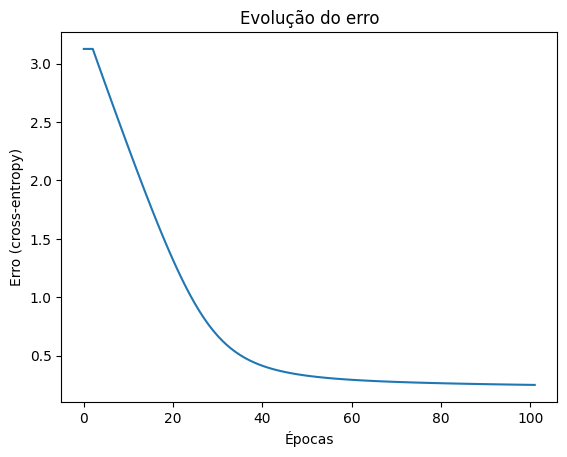

In [ ]:
plt.plot(erros)
plt.xlabel("Épocas")
plt.ylabel("Erro (cross-entropy)")
plt.title("Evolução do erro")
plt.show()

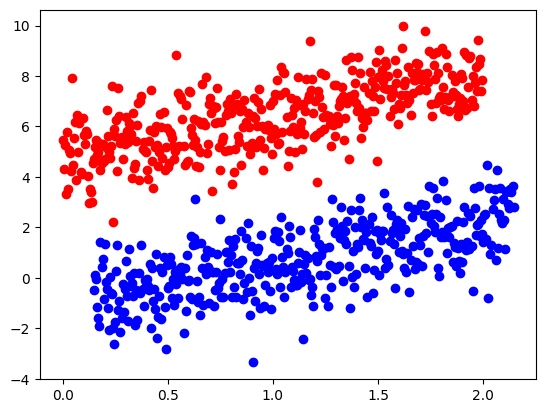

In [ ]:
plt.scatter(x[y[:,0]==0,0], x[y[:,0]==0,1], c="red", label="Feature2")
plt.scatter(x[y[:,0]==1,0], x[y[:,0]==1,1], c="blue", label="Feature1")

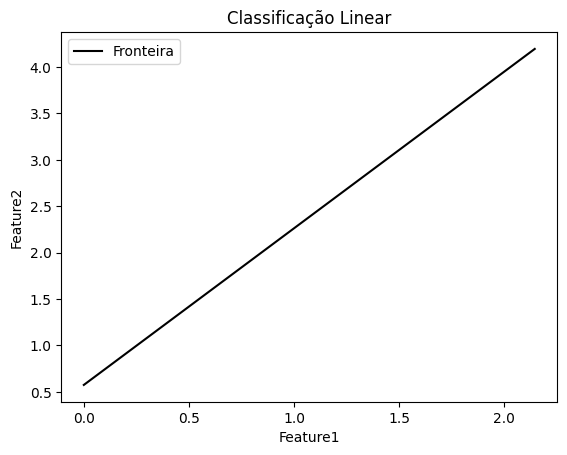

In [ ]:
x1_vals = np.linspace(x[:,0].min(), x[:,0].max(), 100)
x2_vals = -(w[0] + w[1]*x1_vals) / w[2]
plt.plot(x1_vals, x2_vals, "k-", label="Fronteira")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend()
plt.title("Classificação Linear")
plt.show()